In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)


np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=100)

In [2]:
df1 = pd.read_csv('../data/non.csv')
df1['source'] = 'NONs'
df2 = pd.read_csv('../data/acop.csv')
df2['source'] = 'ACOPs'
df3 = pd.read_csv('../data/uao.csv')
df3['source'] = 'UAOs'

df = pd.concat([df1, df2, df3])
print(df.shape)
df.head()

(3656, 8)


,filename,citations,circumstance,year,RTNs,location,link,source
0,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0420', '40.0333', '40.0314']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs
1,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0314', '40.0501', '40.0315', '40.0443', '40.0404']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs
2,2-0000642 - AYER - NON A 09-25-2003,"['40.0740', '40.0550']","the department issued you a tier ic permit, which became effective on august 19, 1994 and expire...",2003,2-0000642,AYER,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0000642,NONs
3,2-0013076 - BELLINGHAM - NON 12-11-2001,"['40.0420', '40.0333']","on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs
4,2-0013076 - BELLINGHAM - NON 12-11-2001,['40.0425'],"on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs


## 1. filecount by source

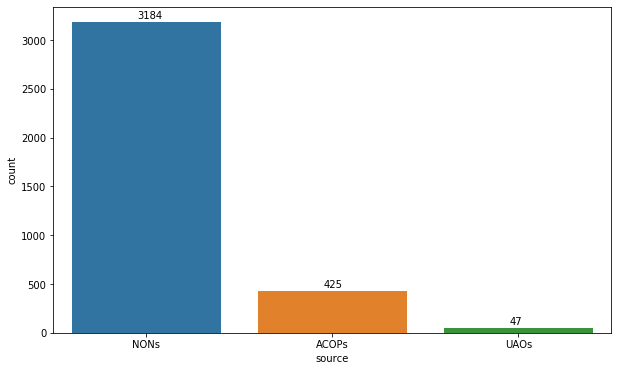

In [3]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(df['source'])
for p, label in zip(ax.patches, df["source"].value_counts()):
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+40))
    
plt.show()

## 2. year counts

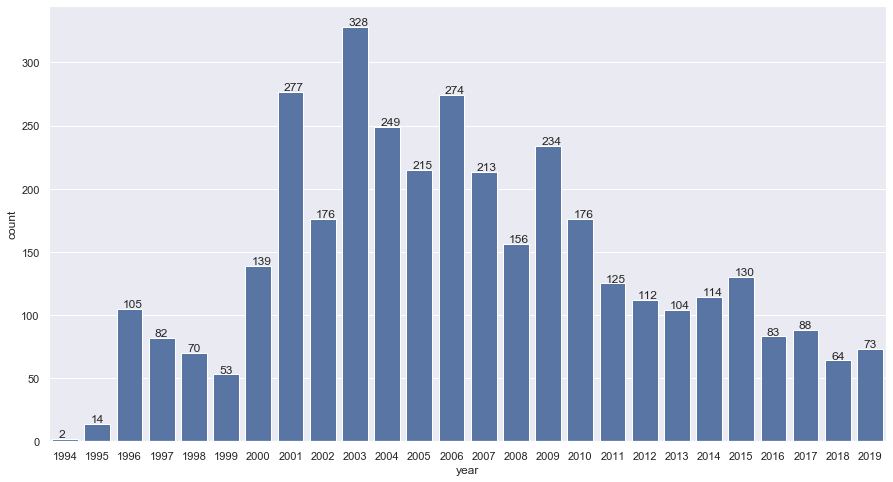

In [23]:
sns.set(style="darkgrid")
# sns.set_context("poster")


plt.figure(figsize = (15, 8))
ax = sns.countplot(df['year'], color='b')

cnt = pd.DataFrame({
    'year':df["year"].value_counts().index,
    'count':df["year"].value_counts().values
}
).sort_values('year')['count']
for p, label in zip(ax.patches, cnt):
    ax.annotate(label, (p.get_x()+0.19, p.get_height()+1.3))
    
plt.show()

In [14]:
df[df.year>=2018].shape

(137, 9)

In [15]:
df[df.year>=2015].shape

(438, 9)

In [16]:
df[df.year>=2009].shape

(1303, 9)

In [17]:
df.shape

(3656, 9)

## 3. num of unique citations (global)

In [18]:
all_c = []
for c in df['citations']:
    for one_c in c[1:-1].split(', '):
        try:
            all_c.append(float(one_c[1:-1]))
        except:
            print(c)

['40.1600', '40.0405', '40,0311', '40.0311', '40.0412']
['40,0412', '40.0420', '40,0411', '40.0560', '40.0874', '40.0810', '40.0313', '40.0864']
['40,0412', '40.0420', '40,0411', '40.0560', '40.0874', '40.0810', '40.0313', '40.0864']
['40.0517', '40.1600', '40.0332', '40,1600', '40.0034', '40.0311', '40.0035', '40.0331']
['40.0030', '40.1600', '40.0420', '40.0031', '40,1600', '40.0311', '40.0400']
['40,0000', '40.1600', '40.0311']
['40.1401', '40.0420', '40.0893', '40,0045', '40.0872', '40.0833', '40.0045', '40.0191', '40.0874', '40.0411', '40.0853', '40.0022', '40.1403', '40.0428', '40.0835']
['40.0405', '40.0371', '40,0313']
['40,0006', '40,0022', '40.0006', '40.0412', '40.0414', '40.0835', '40.0313', '40.0046']
['40,0006', '40,0022', '40.0006', '40.0412', '40.0414', '40.0835', '40.0313', '40.0046']
['40,0313', '40.0313']
['40.0870', '40,0412', '40,0411', '40.0420', '40.0167', '40.0333', '40,0334', '40,0314', '40,0333', '40,1000', '40,0414', '40,0420', '40.0411', '40.0311', '40.0314'

In [19]:
print(len(all_c))
print(len(set(all_c))) # unique citations

7466
285


## 4. num of unique citations (one cirumstance)

In [20]:
f = lambda x: len(x.split(', '))
df["citations_count"] = df['citations'].apply(f)

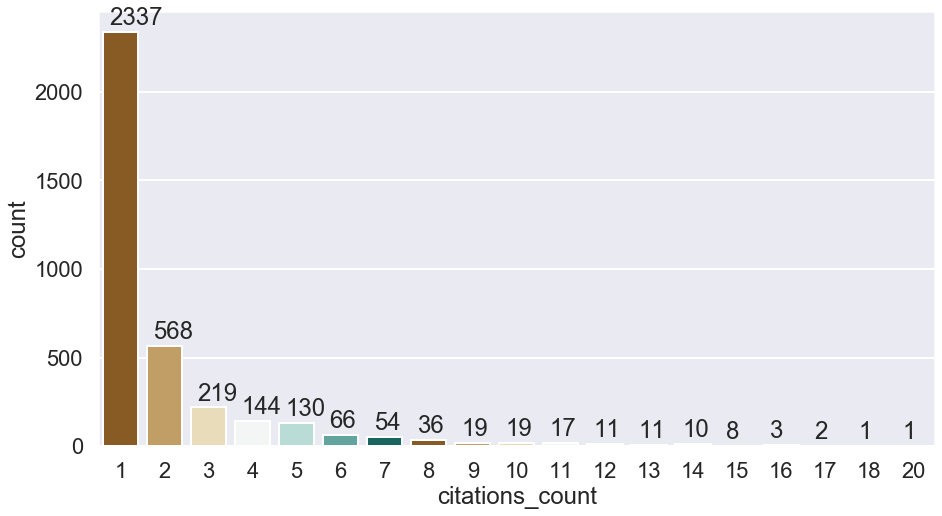

In [22]:
sns.set(style="darkgrid")
sns.set_context("poster")

plt.figure(figsize = (15, 8))
ax = sns.countplot(df["citations_count"], palette=sns.color_palette("BrBG", 7))
for p, label in zip(ax.patches, df["citations_count"].value_counts()):
    ax.annotate(label, (p.get_x()+0.15, p.get_height()+40))
    
plt.show()

## 5. top citations

Text(0.5, 1.0, 'Top 10 Citations Violated')

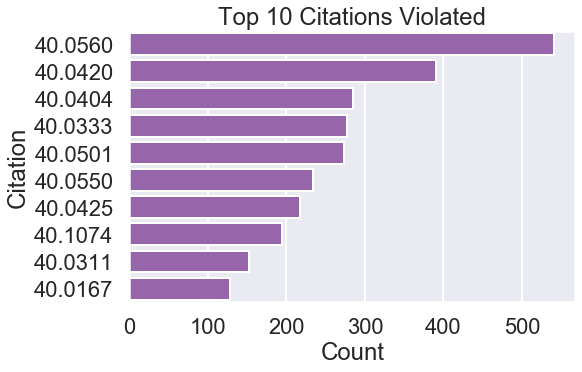

In [132]:
all = df.citations.apply(lambda x: x[1:-1]).tolist()
all_list = []
for i in all:
    i = i.split(', ')
    for c in i:
        all_list.append(c[1:-1])
# print(all_list)

from collections import Counter
all_list = [x for x in all_list if x != '40.0000']
counter = Counter(all_list)
top_10 = dict(counter.most_common(10))

sns.set_context("poster")


plt.figure(figsize=(8, 5))
citation_name, citation_count = list(top_10.keys()), list(top_10.values())
fig_5 = sns.barplot(x=citation_count, y=citation_name, order=citation_name, color="#9b59b6", orient='h')

plt.xlabel("Count")
plt.ylabel("Citation")
plt.title("Top 10 Citations Violated")

## 6. file count by location 

In [24]:
df.loc[df.location=='WORCETER', 'location'] = 'WORCESTER'
df.loc[df.location=='WORCESTSER', 'location'] = 'WORCESTER'
df.loc[df.location=='W BOYLSTON', 'location'] = 'BOYLSTON'  
df.loc[df.location=='WESTBORO', 'location'] = 'WESTBOROUGH'
df.loc[df.location=='MARLBOROGH', 'location'] = 'MARLBOROUGH' 
df.loc[df.location=='NORTH UXBRIDGE', 'location'] = 'NORTHBRIDGE' 

93


Text(0.5, 1.0, 'Top 10 Cities with Most Violations')

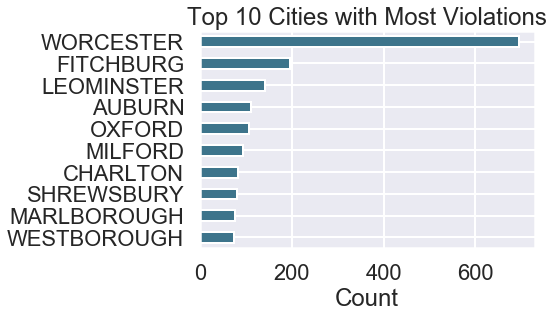

In [111]:
loc_cnt = df['location'].value_counts()
print(loc_cnt.shape[0] - 1) #rm unknown
loc_cnt10 = loc_cnt.head(10)
loc_cnt10.sort_values().plot(kind='barh', color='#3d748b')
plt.xlabel("Count")
plt.title("Top 10 Cities with Most Violations")

In [26]:
loc_cnt

WORCESTER           694
FITCHBURG           196
LEOMINSTER          141
AUBURN              111
OXFORD              106
MILFORD              95
CHARLTON             83
SHREWSBURY           82
MARLBOROUGH          76
WESTBOROUGH          74
CLINTON              74
UXBRIDGE             74
GARDNER              73
HUDSON               67
WEBSTER              61
HOLDEN               58
MEDWAY               57
HOPKINTON            57
MILLBURY             53
STURBRIDGE           52
WINCHENDON           50
ACTON                50
SOUTHBRIDGE          49
BELLINGHAM           47
NORTHBOROUGH         46
GRAFTON              46
SUTTON               44
SPENCER              43
NORFOLK              37
HARVARD              37
DUDLEY               34
AYER                 33
ASHBY                33
HOLLISTON            32
RUTLAND              29
WEST BOYLSTON        29
TEMPLETON            27
MAYNARD              27
HOPEDALE             27
DOUGLAS              27
GROTON               27
BARRE           